# Exploring Weather Trends
*<span style="font-family:Arial; font-size:1.3em;">By: Redi Sunarta - Udacity Student (2020)</span>*

In this project, I will compare the my local temperature trends to overall global temperature trends. An outline as follows:
   1. I will totally use python as my analize tool because I'm more comfortable using it than other tools. However, first of all I gather data for my local cities using SQL.
   2. Load the data, I will focus compare Jakarta-closest big city where I live. Especially started in 1900 in order to avoid missing values.
   3. Then, I will transform the data to Simple Moving Average with 10 years period -use rolling feature in pandas.
   4. Lastly, I will make simple line chart to visualize the data.

## Extract the data
**My query statement in order to get Indonesian Cities.**

    SELECT city, c.year, c.avg_temp city_avg_temp, g.avg_temp global_avg_temp
    FROM city_data c
    LEFT JOIN global_data g
    ON c.year = g.year
    WHERE c.country = 'Indonesia';

## Load the data

In [1]:
#the python packec
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
data = pd.read_csv("results.csv")
data.sample(5)

,city,year,city_avg_temp,global_avg_temp
624,Palembang,1882,26.11,8.13
218,Jakarta,1854,25.95,8.21
314,Jakarta,1950,26.50,8.37
991,Surabaya,1871,26.14,8.12
439,Medan,1886,26.26,7.95


---
## Transform the data

In [3]:
#little bit manipulated
data.rename(columns={"city_avg_temp":"avg_temp", "city":"area"}, inplace=True)
globall = data[["global_avg_temp", "year"]].rename(columns={"global_avg_temp":"avg_temp"})
globall["area"] = "Global"
globall = globall.drop_duplicates()
del data["global_avg_temp"]
data = pd.concat([data, globall])
data = data[data["year"] >= 1900] #in order to exclude missing data
#Made Temperature Simple Moving Average (MA10)
data["ma_avg_temp"]  = data.groupby('area')['avg_temp'].transform(lambda x: x.rolling(10, 1).mean()) 
data.sample(3)

,area,year,avg_temp,ma_avg_temp
668,Palembang,1926,26.82,26.388
186,Bandung,2011,25.38,25.555
325,Jakarta,1961,26.68,26.770


## Visualize the data

Text(0.5, 1.0, 'Adjusted Temperature Comparison')

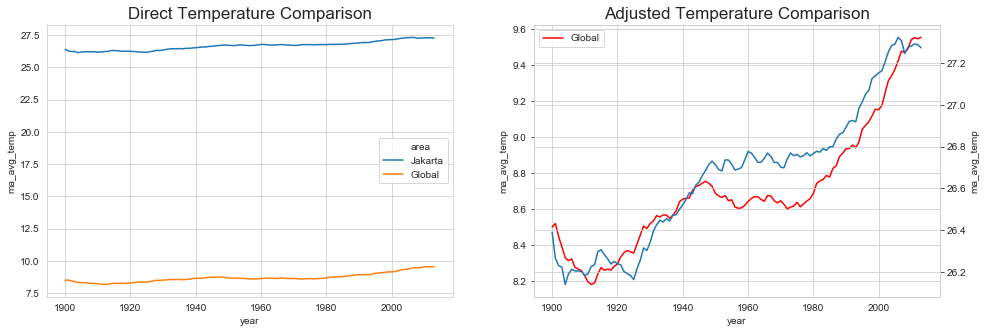

In [4]:
data1 = data[(data["area"] == "Global") | (data["area"] == "Jakarta")]
plt.figure(figsize=(16,5))
sns.set_style("whitegrid")
plt.subplot(1, 2, 1)

sns.lineplot(x="year", y="ma_avg_temp",
                  hue="area", data=data1)
plt.title("Direct Temperature Comparison", size=17)
plt.subplot(1, 2, 2)
sns.lineplot(data.loc[(data["area"] == "Global"), "year"], 
         data.loc[(data["area"] == "Global"), "ma_avg_temp"], color="red", label="Global")
plt.legend()
plt.twinx()
sns.lineplot(data.loc[(data["area"] == "Jakarta"), "year"], 
         data.loc[(data["area"] == "Jakarta"), "ma_avg_temp"])
plt.title("Adjusted Temperature Comparison", size=17)

<span style="font-family:Arial; font-size:1.1em;"> If I directly compare global temperature trend to Jakarta trend, I'll get the left graph which is hard to compare because this two area/scope have naturally different characteristics. In fact, Jakarta is located in a tropical lane and will definitely have a higher temperature than most other places. Therefore, I have to make scale adjustments in order to get a more obvious trend comparison.

</span> <span style="font-family:Arial; font-size:1.1em;">The right graph show me that global and Jakarta temperature trend have strongly postive correlation (0.95). However, in some period like 1910s-1930s or 1940s, Jakarta and Global temperatur trande have opposite direction for a while. I think, it capture how The Great Depression and WW I/II has produced a different impact in Jakarta compared to the global average</span>

## Additional

In [5]:
np.corrcoef(data.loc[(data["area"] == "Global"), "ma_avg_temp"], data.loc[(data["area"] == "Jakarta"), "ma_avg_temp"])

array([[1.        , 0.94813002],
       [0.94813002, 1.        ]])

Text(0.5, 1.0, 'Global Temperature Trends Selected Cities')

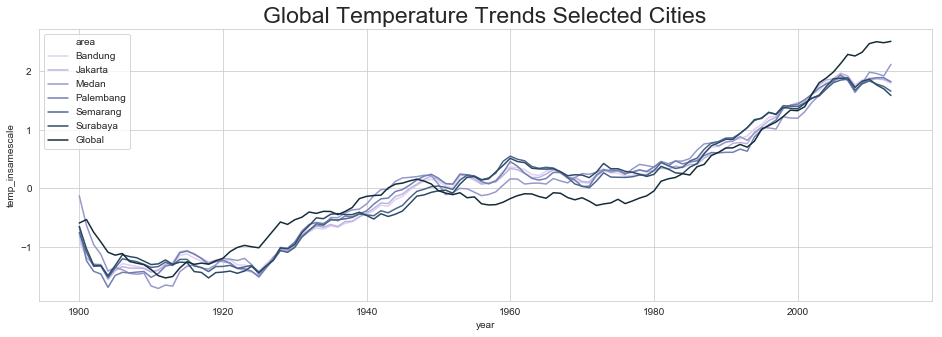

In [6]:
from scipy.stats import zscore
data["temp_insamescale"] = data.groupby('area').ma_avg_temp.transform(lambda x : zscore(x,ddof=1)) #same scale

plt.figure(figsize=(16,5))
sns.lineplot(x="year", y="temp_insamescale",
                  hue="area", data=data, palette="ch:2.5,.25")
plt.title("Global Temperature Trends Selected Cities", size=23)

*Overall, Temperature Trend of Indonesian Cities have almost perferct correlation.*